In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
    name : str
    values : List[int]
    operation : str
    result : str # non lo inizializzo ma viene definito successivamente dal nodo

In [3]:
def process_node(state: AgentState) -> AgentState:
    """node for processing the values based on a certain operation"""

    if state['operation'] == '+': 
        result = sum(state['values'])
    else: 
        result = 1
        for i in state['values']:
            result *= i

    state["result"] = f"Hi {state['name']}, your answer is {result}"

    return state

In [4]:
graph = StateGraph(AgentState)

graph.add_node("processing", process_node)
graph.set_entry_point("processing")
graph.set_finish_point("processing")

app = graph.compile()

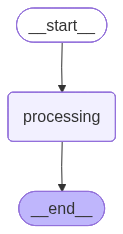

In [5]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
answer = app.invoke({"name": "Saajan", "values": [1,2,3,4], "operation": "+"})

In [8]:
answer

{'name': 'Saajan',
 'values': [1, 2, 3, 4],
 'operation': '+',
 'result': 'Hi Saajan, your answer is 10'}

In [9]:
answer = app.invoke({"name": "Saajan", "values": [1,2,3,4], "operation": "*"})

In [10]:
answer

{'name': 'Saajan',
 'values': [1, 2, 3, 4],
 'operation': '*',
 'result': 'Hi Saajan, your answer is 24'}